# Logistic Regression

By Vivian Zeng Jan/30/2021

U of Notre Dame

**Logistic Regression** is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. 

In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

**Logistic Regression Assumptions**

**1.** Binary logistic regression requires the dependent variable to be binary.

**2.** For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.

**3.** Only the meaningful variables should be included.

**4.** The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.

**5.** The independent variables are linearly related to the log odds.

**6.** Logistic regression requires quite large sample sizes.

In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import pandas.util.testing as tm
import matplotlib.pyplot as plt 
#plt.rcParams['figure.figsize'] = (20,15)
plt.rcParams['figure.dpi'] = 250
plt.rc("font", size=15)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [4]:
#Read Text file
#fileObject = open("nes96_mod.txt", "r")
#data = fileObject.read()
#data

# Data Preprocessing

In [5]:
data = pd.read_csv('nes96_mod.txt', sep="\s{4}", header = None, engine='python')
data.head()

,0
0,"""popul""\t""TVnews""\t""selfLR""\t""ClinLR""\t""DoleLR..."
1,"""1""\t0\t7\t""extCon""\t""extLib""\t""Con""\t""strRep""..."
2,"""2""\t190\t1\t""sliLib""\t""sliLib""\t""sliCon""\t""we..."
3,"""3""\t31\t7\t""Lib""\t""Lib""\t""Con""\t""weakDem""\t24..."
4,"""4""\t83\t4\t""sliLib""\t""Mod""\t""sliCon""\t""weakDe..."


In [6]:
#data = pd.read_csv('nes96_mod.txt', sep="\s+", header = None)
#data = pd.read_csv('nes96_mod.txt', delim_whitespace=True, header = None)
#data = pd.read_csv('nes96_mod.txt', sep="\t", header = None)
data = pd.read_csv('nes96_mod.txt', sep="\t", error_bad_lines=False)
data.head()

,popul,TVnews,selfLR,ClinLR,DoleLR,PID,age,educ,income,vote,income2
1,0,7,extCon,extLib,Con,strRep,36,HS,$3Kminus,Dole,1500
2,190,1,sliLib,sliLib,sliCon,weakDem,20,Coll,$3Kminus,Clinton,1500
3,31,7,Lib,Lib,Con,weakDem,24,BAdeg,$3Kminus,Clinton,1500
4,83,4,sliLib,Mod,sliCon,weakDem,28,BAdeg,$3Kminus,Clinton,1500
5,640,7,sliCon,Con,Mod,strDem,68,BAdeg,$3Kminus,Clinton,1500


In [7]:
PID2=0
data['PID2']=PID2
data.head()

,popul,TVnews,selfLR,ClinLR,DoleLR,PID,age,educ,income,vote,income2,PID2
1,0,7,extCon,extLib,Con,strRep,36,HS,$3Kminus,Dole,1500,0
2,190,1,sliLib,sliLib,sliCon,weakDem,20,Coll,$3Kminus,Clinton,1500,0
3,31,7,Lib,Lib,Con,weakDem,24,BAdeg,$3Kminus,Clinton,1500,0
4,83,4,sliLib,Mod,sliCon,weakDem,28,BAdeg,$3Kminus,Clinton,1500,0
5,640,7,sliCon,Con,Mod,strDem,68,BAdeg,$3Kminus,Clinton,1500,0


In [8]:
data.shape

(944, 12)

In [9]:
data.PID.unique()

array(['strRep', 'weakDem', 'strDem', 'indRep', 'indind', 'weakRep',
       'indDem'], dtype=object)

In [10]:
remove_list = ['indind']
df=data[~data['PID'].isin(remove_list)]
df.head()

,popul,TVnews,selfLR,ClinLR,DoleLR,PID,age,educ,income,vote,income2,PID2
1,0,7,extCon,extLib,Con,strRep,36,HS,$3Kminus,Dole,1500,0
2,190,1,sliLib,sliLib,sliCon,weakDem,20,Coll,$3Kminus,Clinton,1500,0
3,31,7,Lib,Lib,Con,weakDem,24,BAdeg,$3Kminus,Clinton,1500,0
4,83,4,sliLib,Mod,sliCon,weakDem,28,BAdeg,$3Kminus,Clinton,1500,0
5,640,7,sliCon,Con,Mod,strDem,68,BAdeg,$3Kminus,Clinton,1500,0


In [11]:
df.PID.unique()

array(['strRep', 'weakDem', 'strDem', 'indRep', 'weakRep', 'indDem'],
      dtype=object)

In [12]:
repub_list = ['strRep','indRep', 'weakRep']
df[~df['PID'].isin(repub_list)].PID2==1
df.head()

,popul,TVnews,selfLR,ClinLR,DoleLR,PID,age,educ,income,vote,income2,PID2
1,0,7,extCon,extLib,Con,strRep,36,HS,$3Kminus,Dole,1500,0
2,190,1,sliLib,sliLib,sliCon,weakDem,20,Coll,$3Kminus,Clinton,1500,0
3,31,7,Lib,Lib,Con,weakDem,24,BAdeg,$3Kminus,Clinton,1500,0
4,83,4,sliLib,Mod,sliCon,weakDem,28,BAdeg,$3Kminus,Clinton,1500,0
5,640,7,sliCon,Con,Mod,strDem,68,BAdeg,$3Kminus,Clinton,1500,0


In [13]:
df.PID2[(df.PID.isin(['strRep','indRep', 'weakRep']))]=1

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [14]:
df.PID2.unique()

array([1, 0])

In [15]:
df=df[['PID2','income2','age']]
df.shape

(907, 3)

In [16]:
df.income2.unique()

array([  1500,   4000,   6000,   8000,   9000,  10500,  11500,  12500,
        13500,  14500,  16000,  18500,  21000,  23500,  27500,  32500,
        37500,  42500,  47500,  55000,  67500,  82500,  97500, 105000])

# EDA

In [17]:
df.PID2.value_counts()

0    488
1    419
Name: PID2, dtype: int64

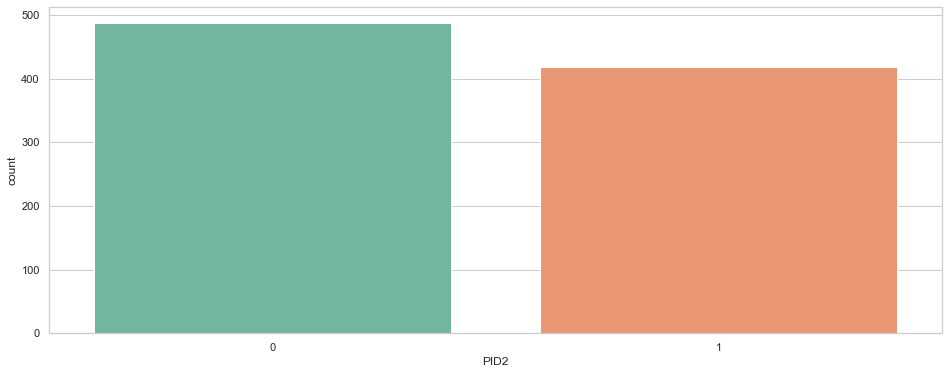

<Figure size 432x288 with 0 Axes>

In [18]:
plt.figure(figsize=(16, 6))
sns.countplot(x='PID2', data=df, palette="Set2")
plt.show()
plt.savefig('count_plot')

**The distribution of response is balanced, if not, use resampler such as SMOT to do the resampling**

In [19]:
count_no_sub = len(df[df['PID2']==0])
count_sub = len(df[df['PID2']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 53.8037486218302
percentage of subscription 46.19625137816979


In [20]:
df.groupby('PID2').describe()

income2                                                                 \
       count          mean           std     min      25%      50%      75%   
PID2                                                                          
0      488.0  40201.844262  28045.920410  1500.0  18500.0  32500.0  55000.0   
1      419.0  51952.267303  29575.082674  1500.0  27500.0  47500.0  67500.0   

                  age                                                      
           max  count       mean        std   min   25%   50%   75%   max  
PID2                                                                       
0     105000.0  488.0  46.405738  16.567184  19.0  34.0  43.0  57.0  91.0  
1     105000.0  419.0  47.761337  16.419306  19.0  35.0  45.0  59.5  89.0

In [21]:
df.groupby('PID2').median()

,income2,age
PID2,,
0,32500,43
1,47500,45


In [22]:
# %matplotlib inline
# pd.crosstab(df.age,data.PID2).plot(kind='bar')
# plt.title('Vote VS Age')
# plt.xlabel('Age')
# plt.ylabel('Frequency of Vote')
# plt.savefig('Vote_Age') 

In [23]:
df.isna().sum()

PID2       0
income2    0
age        0
dtype: int64

In [24]:
df.head()

,PID2,income2,age
1,1,1500,36
2,0,1500,20
3,0,1500,24
4,0,1500,28
5,0,1500,68


# Get the predictors and response, and train, predict dataset

In [25]:
#X = df.loc[:, df.columns != 'PID2']
#y = df.loc[:, df.columns == 'PID2']

In [26]:
y = df.PID2.values
X = df.drop('PID2', axis=1).values
num_cols = [0, 1]
scaler = StandardScaler()
X[:, num_cols] = scaler.fit_transform(X[:, num_cols])

In [27]:
print(df.shape)
print(X.shape)
print(y.shape)

(907, 3)
(907, 2)
(907,)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2021)

# Logistic Regression Model Fitting and Evaluation

In [29]:
lr=LogisticRegression(C=10000)
lr.fit(X_train,y_train)

LogisticRegression(C=10000)

In [30]:
lr.coef_

array([[0.4138599 , 0.32221424]])

In [31]:
lr.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [32]:
lr.predict_proba(X)

array([[0.64952569, 0.35047431],
       [0.71893181, 0.28106819],
       [0.71893181, 0.28106819],
       ...,
       [0.34873036, 0.65126964],
       [0.34873036, 0.65126964],
       [0.34873036, 0.65126964]])

In [42]:
y_pred = lr.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.58


In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[76 22]
 [55 29]]


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.78      0.66        98
           1       0.57      0.35      0.43        84

    accuracy                           0.58       182
   macro avg       0.57      0.56      0.55       182
weighted avg       0.57      0.58      0.56       182



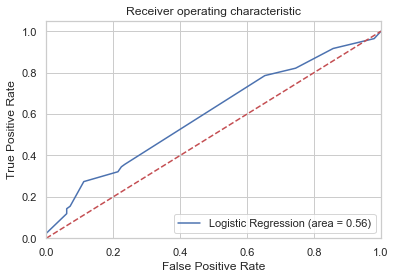

In [46]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Implementing the model

In [47]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.679950
         Iterations 4
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.015     
Dependent Variable: y                AIC:              989.9276  
Date:               2021-01-30 15:56 BIC:              999.0999  
No. Observations:   725              Log-Likelihood:   -492.96   
Df Model:           1                LL-Null:          -500.44   
Df Residuals:       723              LLR p-value:      0.00010985
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     4.0000                                       
--------------------------------------------------------------------
          Coef.     Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
x1        0.3895      0.1064    3.6600    0.0003    0.1809    0.5981
x2        0.2837      0.1130    2.5113    0.0120    0.

In [48]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.680034
         Iterations 4
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.015     
Dependent Variable: y                AIC:              1237.5822 
Date:               2021-01-30 15:56 BIC:              1247.2025 
No. Observations:   907              Log-Likelihood:   -616.79   
Df Model:           1                LL-Null:          -626.06   
Df Residuals:       905              LLR p-value:      1.6703e-05
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     4.0000                                       
--------------------------------------------------------------------
          Coef.     Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
x1        0.4082      0.0932    4.3819    0.0000    0.2256    0.5908
x2        0.2321      0.1018    2.2785    0.0227    0.

In [49]:
import statsmodels.api as sm 
X_train1 = sm.add_constant(X_train)
lm_1 = sm.OLS(y_train, X_train1).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     11.15
Date:                Sat, 30 Jan 2021   Prob (F-statistic):           1.70e-05
Time:                        15:56:48   Log-Likelihood:                -513.08
No. Observations:                 725   AIC:                             1032.
Df Residuals:                     722   BIC:                             1046.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4506      0.018     24.420      0.000       0.414       0.487
x1             0.0998      0.025      3.983      0.000       0.051       0.149
x2             0.0775      0.027      2.833      0.005       0.024       0.131
==============================================================================
Omnibus:                     3122.066   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.056
Skew:                           0.143   Prob(JB):                     5.66e-24
Kurtosis:                       1.139   Cond. No.                         1.54
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
import statsmodels.api as sm 
X1 = sm.add_constant(X)
lm_2 = sm.OLS(y, X).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.047
Model:                            OLS   Adj. R-squared (uncentered):              0.045
Method:                 Least Squares   F-statistic:                              22.21
Date:                Sat, 30 Jan 2021   Prob (F-statistic):                    3.84e-10
Time:                        15:57:30   Log-Likelihood:                         -915.03
No. Observations:                 907   AIC:                                      1834.
Df Residuals:                     905   BIC:                                      1844.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1618      0.029      5.507      0.000       0.104       0.219
x2             0.1397      0.033      4.201      0.000       0.074       0.205
==============================================================================
Omnibus:                     4704.261   Durbin-Watson:                   1.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.610
Skew:                           0.135   Prob(JB):                     7.08e-24
Kurtosis:                       1.342   Cond. No.                         1.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""